In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def in_circle(x, y):
    return x * x + y * y <= 1


def mcmc_pi(n_iterations):
    x, y = 0.5, 0.5  # Start at the center
    inside_circle = 0
    xs, ys = [], []

    for _ in range(n_iterations):
        # Propose a new point
        new_x = x + np.random.normal(0, 0.1)
        new_y = y + np.random.normal(0, 0.1)

        # Accept if it's inside the square [0,1] x [0,1]
        if 0 <= new_x <= 1 and 0 <= new_y <= 1:
            x, y = new_x, new_y

        # Count points inside the circle
        if in_circle(x, y):
            inside_circle += 1

        xs.append(x)
        ys.append(y)

    pi_estimate = 4 * inside_circle / n_iterations
    return pi_estimate, xs, ys

In [3]:
# Run the simulation
n_iterations = 100000
pi_estimate, xs, ys = mcmc_pi(n_iterations)

print(f"Estimated π: {pi_estimate}")
print(f"Actual π: {np.pi}")

Estimated π: 3.15648
Actual π: 3.141592653589793


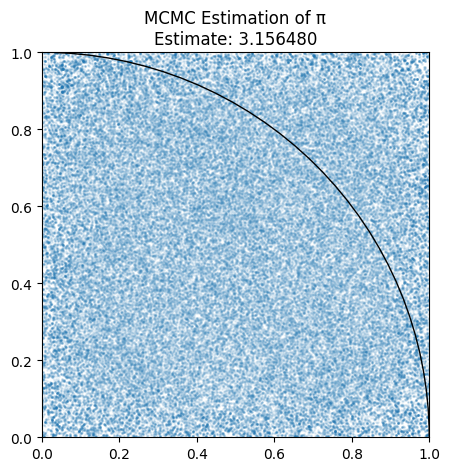

In [4]:
# Plot the results
plt.figure(figsize=(5, 5))
plt.scatter(xs, ys, alpha=0.1, s=1)
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title(f"MCMC Estimation of π\nEstimate: {pi_estimate:.6f}")
plt.show()